In [3]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random

In [4]:
df = pd.read_csv('SMSSpamCollection.csv', sep='\t',
                           names=["label", "message"])

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


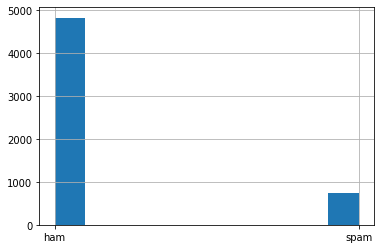

In [11]:
df['label'].hist()

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import preprocessor as p
lemmatizer = WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
corpus = []
hashtag=[]
for i in range(0,len(df)):
    hashtag=re.findall(r'#(\w+)', df["message"][i]) #hashtags
    show=p.clean(df["message"][i])
    show=re.sub(r'[0-9]+', '', show) #digits
    show=re.sub(r'[^\w\s]', '', show) #puntuation
    show = show.lower()
    show = show.split()
    show = [lemmatizer.lemmatize(word) for word in show if not word in stopwords.words('english')]
    show = ' '.join(show)
    corpus.append(show)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [15]:
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

In [17]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)



[multinomialNaivebayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)

In [19]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [22]:
y_pred = spam_detect_model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)

In [24]:
confusion_m

array([[955,   0],
       [ 32, 128]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [26]:
accuracy

0.9713004484304932